##Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sn

from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/dataset setelah uts/Credit Card Fraud Detection.xlsx')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-13598071336738,-727811733098497,253634673796914,137815522427443,-338320769942518,462387777762292,239598554061257,986979012610507,363786969611213,...,-18306777944153,277837575558899,-110473910188767,669280749146731,128539358273528,-189114843888824,133558376740387,-210530534538215,14962,0
1,0,119185711131486,26615071205963,16648011335321,448154078460911,600176492822243,-823608088155687,-788029833323113,851016549148104,-255425128109186,...,-225775248033138,-638671952771851,101288021253234,-339846475529127,167170404418143,125894532368176,-898309914322813,147241691924927,269,0
2,1,-135835406159823,-134016307473609,177320934263119,379779593034328,-503198133318193,180049938079263,791460956450422,247675786588991,-151465432260583,...,247998153469754,771679401917229,909412262347719,-689280956490685,-327641833735251,-139096571514147,-553527940384261,-597518405929204,37866,0
3,1,-966271711572087,-185226008082898,179299333957872,-863291275036453,-103088796030823,124720316752486,23760893977178,377435874652262,-138702406270197,...,-108300452035545,527359678253453,-190320518742841,-117557533186321,647376034602038,-221928844458407,627228487293033,614576285006353,1235,0
4,2,-115823309349523,877736754848451,1548717846511,403033933955121,-407193377311653,959214624684256,592940745385545,-270532677192282,817739308235294,...,-943069713232919,79827849458971,-137458079619063,141266983824769,-206009587619756,502292224181569,219422229513348,215153147499206,6999,0


##Analisis Info Dataset dan Pre Processing

In [ ]:
data.drop(['Time', 'Amount'], axis=1, inplace=True)

In [ ]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-13598071336738,-727811733098497,253634673796914,137815522427443,-338320769942518,462387777762292,239598554061257,986979012610507,363786969611213,907941719789316,...,251412098239705,-18306777944153,277837575558899,-110473910188767,669280749146731,128539358273528,-189114843888824,133558376740387,-210530534538215,0
1,119185711131486,26615071205963,16648011335321,448154078460911,600176492822243,-823608088155687,-788029833323113,851016549148104,-255425128109186,-166974414004614,...,-690831352230203,-225775248033138,-638671952771851,101288021253234,-339846475529127,167170404418143,125894532368176,-898309914322813,147241691924927,0
2,-135835406159823,-134016307473609,177320934263119,379779593034328,-503198133318193,180049938079263,791460956450422,247675786588991,-151465432260583,207642865216696,...,524979725224404,247998153469754,771679401917229,909412262347719,-689280956490685,-327641833735251,-139096571514147,-553527940384261,-597518405929204,0
3,-966271711572087,-185226008082898,179299333957872,-863291275036453,-103088796030823,124720316752486,23760893977178,377435874652262,-138702406270197,-549519224713749,...,-208037781160366,-108300452035545,527359678253453,-190320518742841,-117557533186321,647376034602038,-221928844458407,627228487293033,614576285006353,0
4,-115823309349523,877736754848451,1548717846511,403033933955121,-407193377311653,959214624684256,592940745385545,-270532677192282,817739308235294,753074431976354,...,408542360392758,-943069713232919,79827849458971,-137458079619063,141266983824769,-206009587619756,502292224181569,219422229513348,215153147499206,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-118811178854323,100717849710003,-983478345739033,-206665568459413,-536447278097585,-26068373309456,-491821543115252,7305334020798,19144282734458,435617041320691,...,14758291346555,213454108437359,111863735978609,101447989719391,-509348453168509,14368069070214,250034279569581,943651171507532,823730961486502,0
284803,-732788670658956,-550804899173326,203502974528243,-73858858438744,868229398914682,105841527222565,243296959175797,294868698501783,584800017281683,-975926063322508,...,596158998872689,214205341747019,924383584903381,124630383316793,-101622566867336,-606623985854728,-395255065710324,684724700405593,-535273892010011,0
284804,191956500980048,-301253845990644,-324963981406834,-55782812475002,263051512011547,303126009781428,-296826527116156,708417184967134,432454047632915,-484781755751029,...,139597028995166,232045035925397,57822900992263,-375008550221367,640133881346421,265745453243744,-873705959041059,445477213829229,-265608285615222,0
284805,-240440049680947,530482513118839,702510230095103,689799168040973,-377961134444982,62370772214768,-68617998628885,679145459790659,392086712465972,-399125651432835,...,127433515805355,265244916386865,800048741498139,-163297944406659,123205243742508,-569158864158597,546668462188323,108820734744839,104532821478796,0


In [ ]:
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% dari dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% dari dataset')

No Frauds 99.83 % dari dataset
Frauds 0.17 % dari dataset


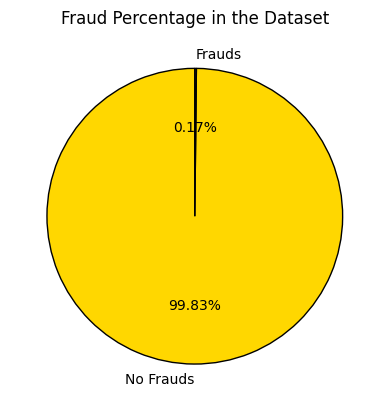

In [ ]:
import matplotlib.pyplot as plt

# Data persentase
fraud_percentage = [data['Class'].value_counts()[0] / len(data) * 100,
                    data['Class'].value_counts()[1] / len(data) * 100]

# Warna untuk setiap bagian
colors = ['#FFD700','#3B3B3C']

# Plot diagram lingkaran
plt.pie(fraud_percentage, labels=['No Frauds', 'Frauds'], autopct='%1.2f%%', startangle=90, colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})

# Tambahkan judul
plt.title('Fraud Percentage in the Dataset')

# Tampilkan diagram lingkaran
plt.show()


In [ ]:
# Menghitung Nilai Median dari data yang bertype Numerik
data_creditcard = data.select_dtypes(include=np.number).median()
data = pd.DataFrame(data_creditcard[:-1])

In [ ]:
data.reset_index(inplace=True)
newdata = data.copy()
newdata.columns = ['transaksi', 'median']
newdata.head()

,transaksi,median
0,V1,1.964756e+12
1,V2,2.875949e+13
2,V3,8.055800e+13
3,V4,-1.045030e+13
4,V5,-2.194554e+13


In [ ]:
newdata.shape

(28, 2)

In [ ]:
newdata.describe()

,median
count,2.800000e+01
mean,4.713652e+11
std,5.695018e+13
min,-1.176460e+14
25%,-2.235283e+13
50%,2.184004e+12
75%,2.724444e+13
max,1.056419e+14


In [ ]:
newdata.columns

Index(['transaksi', 'median'], dtype='object')

In [ ]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   transaksi  28 non-null     object 
 1   median     28 non-null     float64
dtypes: float64(1), object(1)
memory usage: 576.0+ bytes


In [ ]:
newdata.isnull().sum()

transaksi    0
median       0
dtype: int64

In [ ]:
percentile_95 = np.percentile(newdata['median'], 95, method='median_unbiased')
percentile_5 = np.percentile(newdata['median'], 5, method='median_unbiased')
greater_than_95 = (newdata[['median']] > percentile_95)
smaller_than_5 = (newdata[['median']] < percentile_5)

In [ ]:
 #Membuat kolom baru dengan nama colors untuk menyimpan warna setiap kondisi diatas
newdata['colors'] = np.where(greater_than_95,'r',np.where(smaller_than_5,'r','b'))

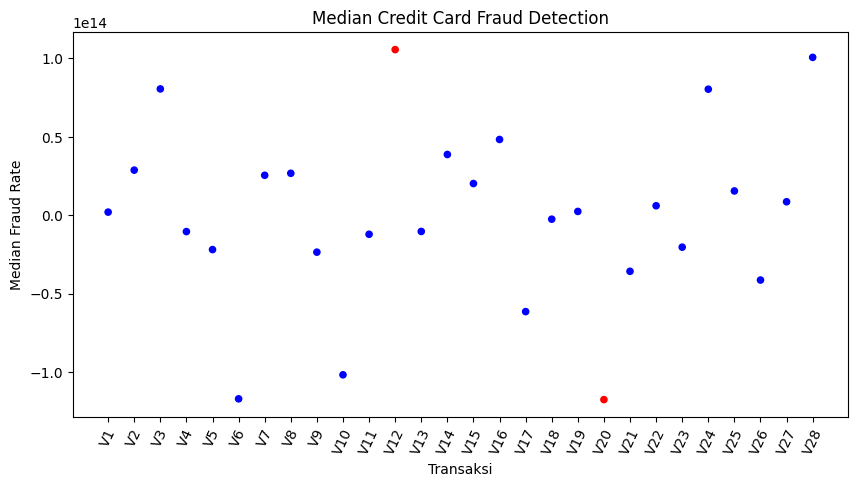

In [ ]:
import matplotlib.pyplot as plt
newdata.plot.scatter(x='transaksi',y='median',c = newdata['colors'].apply(lambda x: dict(r='red', b='blue')[x]),
           figsize=(10, 5),title='Median Credit Card Fraud Detection',xlabel='Transaksi',ylabel='Median Fraud Rate')
plt.xticks(rotation=65);

##Algoritma yang difunakan untuk deteksi anomali atau outlier

###1. Pendekatan Unsupervised dengan algoritma Local Outlier Factor (LOF)

Local Outlier Factor (LOF) diperkenalkan sebagai pendekatan baru untuk mendeteksi outlier pada tahun 2000 oleh Breunig dan rekannya. Sebelumnya, deteksi anomali berfokus pada tugas klasifikasi biner, di mana pengklasifikasi dilatih untuk mendeteksi apakah sesuatu merupakan outlier berdasarkan data sampel.Pendekatan ini memiliki kekurangan, yang diatasi oleh pendekatan baru ini dengan memberikan nilai yang menunjukkan sejauh mana sesuatu merupakan outlier—LOF. Inovasi utama dalam metode ini adalah fitur lokalitas: Titik data dibandingkan dengan lingkungan lokal—bukan keseluruhan kumpulan data—untuk menilai seberapa terisolasi titik tertentu menggunakan algoritme pengelompokan tanpa pengawasan berbasis kepadatan seperti k-nearest neighbour (KNN).

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
model_LOF = LocalOutlierFactor()
LOF_predictions = model_LOF.fit_predict(newdata[['median']])
model_LOF_scores = model_LOF.negative_outlier_factor_
newdata['LOF_anomaly_scores'] = model_LOF_scores
newdata['LOF_anomaly'] = LOF_predictions

<ipython-input-21-ed104117212d>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


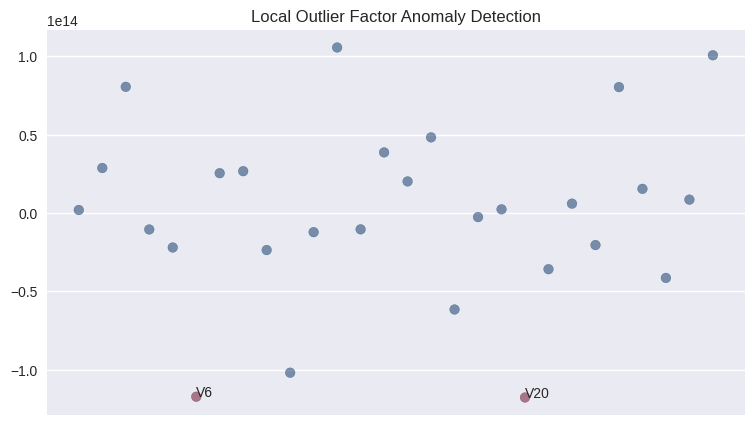

In [ ]:
plt.style.use("seaborn")
fig, ax = plt.subplots(1, figsize=(9, 5), sharex=True, sharey=False)
ax.scatter(newdata['transaksi'], newdata['median'],c=newdata['LOF_anomaly'],cmap='RdBu',alpha=0.5 )
ax.set_title("Local Outlier Factor Anomaly Detection")

for anomaly in newdata[newdata['LOF_anomaly'] == -1]['transaksi']:
    ax.annotate(anomaly, xy=(anomaly, newdata[newdata['transaksi'] == anomaly]['median']),
                 xytext=(anomaly,newdata[newdata['transaksi'] == anomaly]['median'] + 0.2))
ax.get_xaxis().set_visible(False)

Model LOF scikit-learn hanya mengidentifikasi tahun 1974 dan 1980 sebagai outlier. Skenario ini menggambarkan salah satu kelemahan utama algoritme ini yaitu bahwa Algoritma ini sangat sensitif terhadap nilai parameter. Model LocalOutlierFactor di scikit-learn menggunakan nilai default k=20 untuk jumlah tetangga terdekat dan fungsi jarak Euclidean untuk menghitung jarak jangkauan. Perubahan kecil pada nilai parameter ini dapat memengaruhi hasil secara signifikan, sehingga berpotensi mengarah pada identifikasi kumpulan outlier yang berbeda. Hal ini dapat mempersulit pencapaian hasil yang konsisten dan interpretasi keluaran model LOF secara akurat. Untuk menggambarkan betapa sensitifnya algoritma LOF terhadap nilai parameter, coba gunakan nilai yang berbeda untuk jumlah tetangga terdekat. Pada kode di bawah, Anda akan membuat instance baru model LocalOutlierFactor dengan nilai n_neighbors=10.

In [ ]:
model_LOF_10 = LocalOutlierFactor(n_neighbors=10)
LOF_predictions_10 = model_LOF_10.fit_predict(newdata[['median']])
model_LOF_scores_10= model_LOF_10.negative_outlier_factor_
newdata['LOF_anomaly_score_10'] = model_LOF_scores_10
newdata['LOF_anomaly_10'] = LOF_predictions_10

<ipython-input-23-c5b81c2a3ca3>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


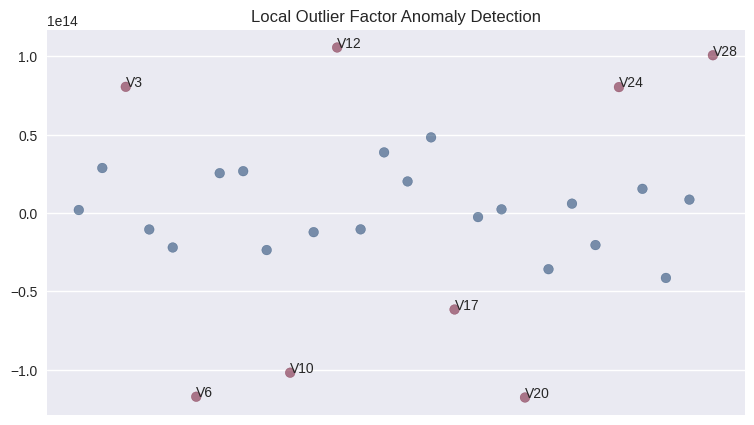

In [ ]:
plt.style.use("seaborn")
fig, ax2 = plt.subplots(1, figsize=(9, 5), sharex=True, sharey=False)
ax2.scatter(newdata['transaksi'], newdata['median'],c=newdata['LOF_anomaly_10'],cmap='RdBu',alpha=0.5 )
ax2.set_title("Local Outlier Factor Anomaly Detection")

for anomaly in newdata[newdata['LOF_anomaly_10'] == -1]['transaksi']:
    ax2.annotate(anomaly, xy=(anomaly, newdata[newdata['transaksi'] == anomaly]['median']),
                 xytext=(anomaly,newdata[newdata['transaksi'] == anomaly]['median'] + 0.2))
ax2.get_xaxis().set_visible(False)

Dengan menggunakan nilai n_neighbours=10, maka model mempertimbangkan 10 tetangga terdekat dari setiap titik saat menghitung skor anomali. Ini menghasilkan hasil yang berbeda dari model default dengan nilai n_neighbours=20. Dengan demikian, engubah nilai parameter dapat mempengaruhi hasil algoritma LOF. Untuk membandingkan hasil model LOF dengan nilai parameter yang berbeda, Seperti yang Anda lihat, model LocalOutlierFactor dengan 10 k-tetangga menggunakan tingkat inflasi median dunia untuk secara akurat mengidentifikasi tingkat inflasi tinggi pada tahun 1970an dan awal 1980an(ada 4 titik yang ideteksi outlier). Hal ini merupakan pencapaian yang signifikan, karena analisis ekonomi sebelumnya juga mengidentifikasi tahun-tahun ini sebagai tahun-tahun yang tidak menguntungkan.Namun, berbeda dengan analisis sebelumnya (dengan regresi), ternyata dengan LOF tidak ada model yang menandai tahun 2015 dan 2016 sebagai anomali. Perbedaan ini menyoroti pentingnya menganalisis secara cermat hasil berbagai model dan mempertimbangkan berbagai pendekatan saat melakukan analisis ekonomi.

###2. Pendekatan dengan algoritma Isolation Forest

Algoritma Isolation Forest (iForest) adalah model berbasis pohon (tree) yang dirancang untuk mengatasi kelemahan pendekatan berbasis kepadatan seperti LOF. iForest membangun Ensemble pohon isolasi, atau iTrees, untuk kumpulan data tertentu. Anomali diidentifikasi sebagai contoh dengan panjang jalur rata-rata yang lebih pendek di iTrees, karena jumlahnya “sedikit dan berbeda” dan, oleh karena itu, lebih rentan terhadap isolasi dibandingkan titik normal.Pada Isolation Forest, titik normal biasanya diisolasi pada simpul daun pohon, atau dikenal sebagai ujung pohon yang lebih dalam. Sebaliknya, titik-titik anomali diisolasi lebih dekat ke akar pohon. Hal ini karena titik normal lebih mirip dengan titik lain dalam subgrupnya dan memerlukan lebih banyak pemisahan untuk dapat diisolasi sepenuhnya, sedangkan titik anomali kurang serupa dan dapat diisolasi dengan lebih sedikit pemisahan.

In [ ]:
from sklearn.ensemble import IsolationForest
model_IF = IsolationForest()
model_IF.fit(newdata[['median']])
newdata['IF_anomaly_scores'] = model_IF.decision_function(newdata[['median']])
newdata['IF_anomaly'] = model_IF.predict(newdata[['median']])

<ipython-input-25-de9a703a5255>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


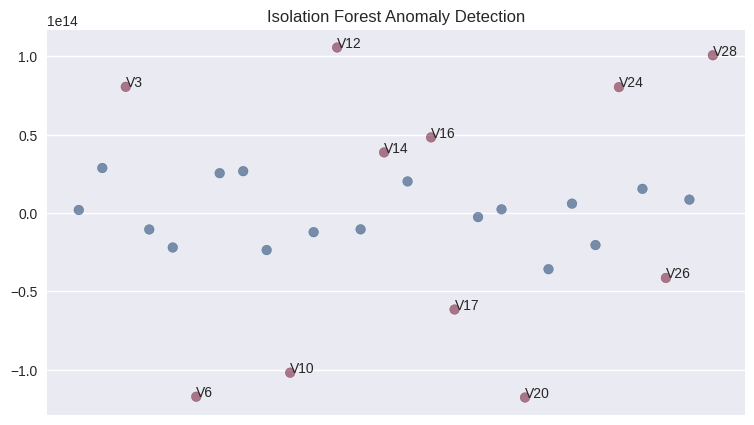

In [ ]:
plt.style.use("seaborn")
fig, ax3 = plt.subplots(1, figsize=(9, 5), sharex=True, sharey=False)
ax3.scatter(newdata['transaksi'], newdata['median'],c=newdata['IF_anomaly'],cmap='RdBu',alpha=0.5 )
ax3.set_title("Isolation Forest Anomaly Detection")

for anomaly in newdata[newdata['IF_anomaly'] == -1]['transaksi']:
    ax3.annotate(anomaly, xy=(anomaly, newdata[newdata['transaksi'] == anomaly]['median']),
                 xytext=(anomaly,newdata[newdata['transaksi'] == anomaly]['median'] + 0.2))
ax3.get_xaxis().set_visible(False)

In [ ]:
model_IF_05 = IsolationForest(contamination=float(.05))
model_IF_05.fit(newdata[['median']])
newdata['IF_anomaly_scores_05'] = model_IF_05.decision_function(newdata[['median']])
newdata['IF_anomaly_05'] = model_IF_05.predict(newdata[['median']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


<ipython-input-27-61ed0168e48a>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


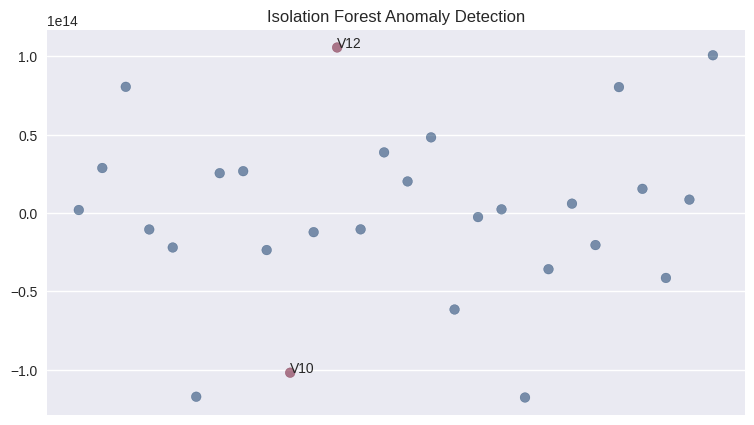

In [ ]:
plt.style.use("seaborn")
fig, ax4 = plt.subplots(1, figsize=(9, 5), sharex=True, sharey=False)
ax4.scatter(newdata['transaksi'], newdata['median'],c=newdata['IF_anomaly_05'],cmap='RdBu',alpha=0.5 )
ax4.set_title("Isolation Forest Anomaly Detection")

for anomaly in newdata[newdata['IF_anomaly_05'] == -1]['transaksi']:
    ax4.annotate(anomaly, xy=(anomaly, newdata[newdata['transaksi'] == anomaly]['median']),
                 xytext=(anomaly,newdata[newdata['transaksi'] == anomaly]['median'] + 0.2))
ax4.get_xaxis().set_visible(False)

###3. Pendekatan Unsupervised dengan algoritma One Class SVM

In [ ]:
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

In [ ]:
# Buat DataFrame
newdata = {'transaksi': np.arange(1, 21), 'median': np.random.randn(20)}
newdata = pd.DataFrame(newdata)

# Latih model One-Class SVM
model_OCSVM = OneClassSVM(gamma='auto')
OCSVM_predictions = model_OCSVM.fit_predict(newdata[['median']])
OCSVM_scores = model_OCSVM.decision_function(newdata[['median']])
newdata['OCSVM_anomaly_scores'] = OCSVM_scores
newdata['OCSVM_anomaly'] = OCSVM_predictions

<ipython-input-30-719a65e43c45>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(


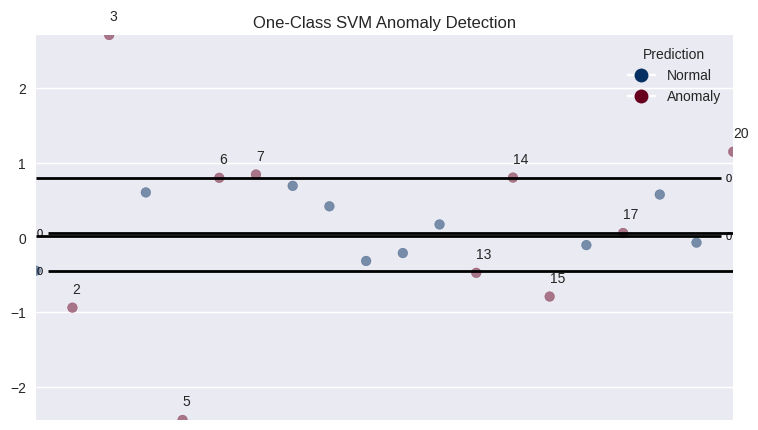

In [ ]:
# Visualisasi
plt.style.use("seaborn")
fig, ax = plt.subplots(1, figsize=(9, 5), sharex=True, sharey=False)
scatter = ax.scatter(newdata['transaksi'], newdata['median'], c=newdata['OCSVM_anomaly'], cmap='RdBu', alpha=0.5)

ax.set_title("One-Class SVM Anomaly Detection")

# Anotasi untuk titik-titik yang dianggap anomali
for anomaly in newdata[newdata['OCSVM_anomaly'] == -1]['transaksi']:
    ax.annotate(anomaly, xy=(anomaly, newdata.loc[newdata['transaksi'] == anomaly, 'median']),
                xytext=(anomaly, newdata.loc[newdata['transaksi'] == anomaly, 'median'] + 0.2))

ax.get_xaxis().set_visible(False)

# Tambahkan warna batas keputusan One-Class SVM
xx, yy = np.meshgrid(np.linspace(newdata['transaksi'].min(), newdata['transaksi'].max(), 500),
                     np.linspace(newdata['median'].min(), newdata['median'].max(), 500))
Z = model_OCSVM.decision_function(np.c_[yy.ravel()])
Z = Z.reshape(xx.shape)

contour = ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
ax.clabel(contour, inline=True, fontsize=8)

# Tampilkan legenda untuk warna scatter plot
legend_labels = {1: 'Normal', -1: 'Anomaly'}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)),
                      markersize=10, label=legend_labels[label]) for label in legend_labels]

ax.legend(handles=handles, title="Prediction")
plt.show()

In [ ]:
# Latih model One-Class SVM dengan contamination 0.05
model_OCSVM_05 = OneClassSVM(gamma='auto', nu=0.05)  # nu adalah parameter yang setara dengan contamination
OCSVM_predictions_05 = model_OCSVM_05.fit_predict(newdata[['median']])
OCSVM_scores_05 = model_OCSVM_05.decision_function(newdata[['median']])
newdata['OCSVM_anomaly_scores_05'] = OCSVM_scores_05
newdata['OCSVM_anomaly_05'] = OCSVM_predictions_05

<ipython-input-32-08c30c4de52a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(


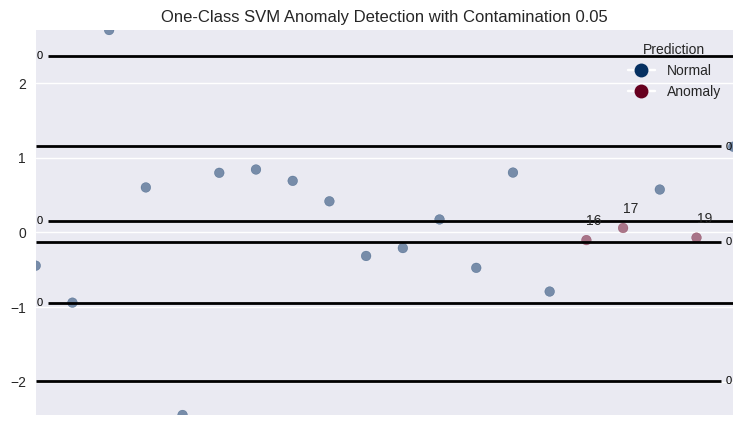

In [ ]:
# Visualisasi
plt.style.use("seaborn")
fig, ax = plt.subplots(1, figsize=(9, 5), sharex=True, sharey=False)
scatter = ax.scatter(newdata['transaksi'], newdata['median'], c=newdata['OCSVM_anomaly_05'], cmap='RdBu', alpha=0.5)

ax.set_title("One-Class SVM Anomaly Detection with Contamination 0.05")

# Anotasi untuk titik-titik yang dianggap anomali
for anomaly in newdata[newdata['OCSVM_anomaly_05'] == -1]['transaksi']:
    ax.annotate(anomaly, xy=(anomaly, newdata.loc[newdata['transaksi'] == anomaly, 'median']),
                xytext=(anomaly, newdata.loc[newdata['transaksi'] == anomaly, 'median'] + 0.2))

ax.get_xaxis().set_visible(False)

# Tambahkan warna batas keputusan One-Class SVM
xx, yy = np.meshgrid(np.linspace(newdata['transaksi'].min(), newdata['transaksi'].max(), 500),
                     np.linspace(newdata['median'].min(), newdata['median'].max(), 500))
Z = model_OCSVM_05.decision_function(np.c_[yy.ravel()])
Z = Z.reshape(xx.shape)

contour = ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
ax.clabel(contour, inline=True, fontsize=8)

# Tampilkan legenda untuk warna scatter plot
legend_labels = {1: 'Normal', -1: 'Anomaly'}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)),
                      markersize=10, label=legend_labels[label]) for label in legend_labels]

ax.legend(handles=handles, title="Prediction")
plt.show()

##Matriks Evaluasi Kinerja dari tiap tiap Algoritma yang digunakan

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/dataset setelah uts/Credit Card Fraud Detection.xlsx')
data.head()
y_true=data['Class']
data=data.drop('Class',1)

<ipython-input-33-7b62e1fb17bd>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data=data.drop('Class',1)


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor ## Only available with scikit-learn 0.19 and later

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y_true, test_size=0.3, random_state=42)

In [ ]:
def preprocess(data):
    for col in data:
        data[col]=(data[col]-np.min(data[col]))/(np.max(data[col])-np.min(data[col]))
    return

def train(X,clf,ensembleSize=5,sampleSize=10000):
    mdlLst=[]
    for n in range(ensembleSize):
        X=data.sample(sampleSize)
        clf.fit(X)
        mdlLst.append(clf)
    return mdlLst

def predict(X,mdlLst):
    y_pred=np.zeros(X.shape[0])
    for clf in mdlLst:
        y_pred=np.add(y_pred,clf.decision_function(X).reshape(X.shape[0],))
    y_pred=(y_pred*1.0)/len(mdlLst)
    return y_pred

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,f1_score

### 1. Matriks Evaluasi Kinerja Algoritma Local Outlier Factor (ROC Auc Score dan F1 Score)

In [ ]:
clf=LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30, \
                   metric='minkowski', p=2, metric_params=None, contamination=0.1, n_jobs=-1)

In [ ]:
lof_y_pred=clf.negative_outlier_factor_

#Creating class labels based on decision function
lof_y_pred_class=lof_y_pred.copy()
lof_y_pred_class[lof_y_pred>=np.percentile(lof_y_pred,95)]=1
lof_y_pred_class[lof_y_pred<np.percentile(lof_y_pred,95)]=0

In [ ]:
roc_auc_score(y_test, lof_y_pred_class)

0.4823198254884262

In [ ]:
f1_score(y_test, lof_y_pred_class)

0.0009072352007257881

<Axes: >

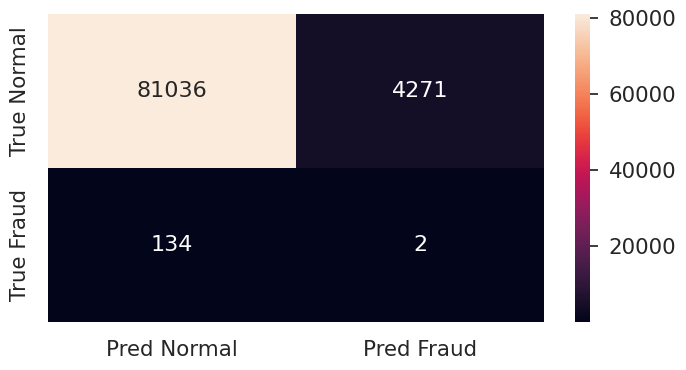

In [ ]:
lof_cm=confusion_matrix(y_test, lof_y_pred_class)

df_cm = pd.DataFrame(lof_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
pyplot.figure(figsize = (8,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

### 2. Matriks Evaluasi Kinerja Algoritma Isolation Forest (ROC Auc Score dan F1 Score)

In [ ]:
alg=IsolationForest(n_estimators=100, max_samples='auto', contamination=0.01, \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

In [ ]:
if_mdlLst=train(X_train,alg)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
if_y_pred=predict(X_test,if_mdlLst)
if_y_pred=1-if_y_pred

#Creating class labels based on decision function
if_y_pred_class=if_y_pred.copy()
if_y_pred_class[if_y_pred>=np.percentile(if_y_pred,95)]=1
if_y_pred_class[if_y_pred<np.percentile(if_y_pred,95)]=0

In [ ]:
roc_auc_score(y_test, if_y_pred_class)

0.5191431432080258

In [ ]:
f1_score(y_test, if_y_pred_class)

0.005443411204354729

In [ ]:
if_cm=confusion_matrix(y_test, if_y_pred_class)

<Axes: >

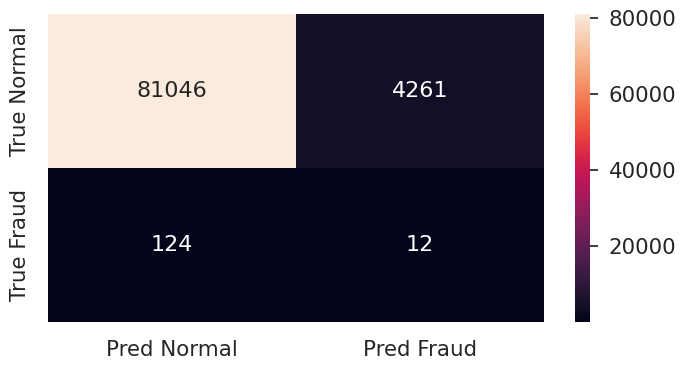

In [ ]:
import seaborn as sn
from matplotlib import pyplot
df_cm = pd.DataFrame(if_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
pyplot.figure(figsize = (8,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

### Kesimpulan dan Perbandingan

In [ ]:
## Performance Plot
auc_scores={
    'Isolation Forest': roc_auc_score(y_test, if_y_pred_class),
    'LOF':roc_auc_score(y_test, lof_y_pred_class),
}

f1_scores={
    'Isolation Forest':f1_score(y_test, if_y_pred_class),
    'LOF':f1_score(y_test, lof_y_pred_class),
}

Text(0.5, 0, 'AUC Score')

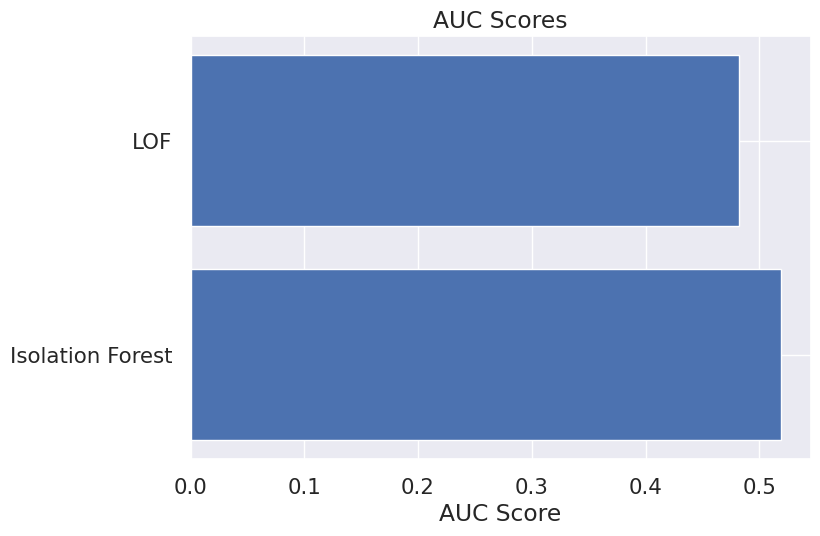

In [ ]:
pyplot.title('AUC Scores')
pyplot.barh(range(len(auc_scores)), list(auc_scores.values()), align='center')
pyplot.yticks(range(len(auc_scores)), list(auc_scores.keys()))
pyplot.xlabel('AUC Score')

Text(0.5, 0, 'F1 Score')

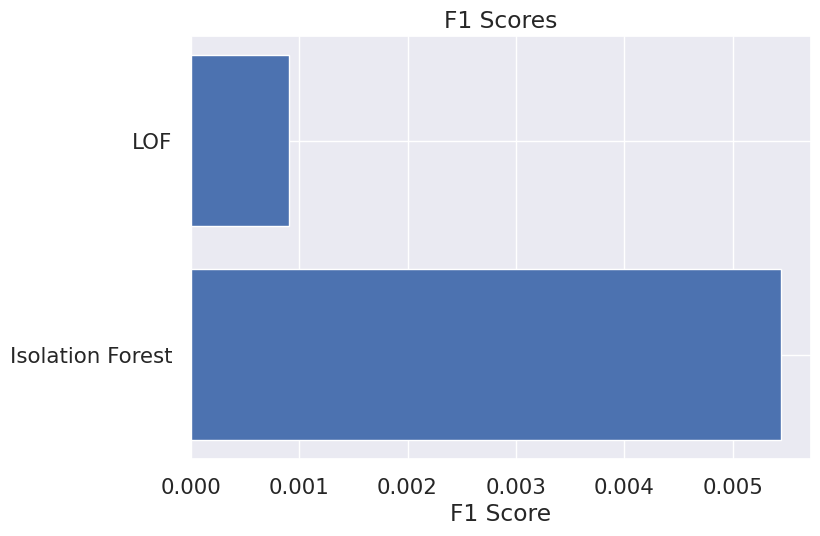

In [ ]:
pyplot.title('F1 Scores')
pyplot.barh(range(len(f1_scores)), list(f1_scores.values()), align='center')
pyplot.yticks(range(len(f1_scores)), list(f1_scores.keys()))
pyplot.xlabel('F1 Score')